In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from BHDVCS_tf_modified import *
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
import os 
def combine_csvs(name):
    big_df = pd.DataFrame()
    for i in range(17):
        filename = f'{name}{i}.csv'
        filepath = os.path.join('Work/Aaryan/Fixing DVCS/Rivanna Preds', filename)
        df = pd.read_csv(filename)
        big_df = pd.concat([big_df, df], ignore_index=True)
    return big_df

def add_real_CFFs(df):
    cffs = pd.read_csv('PseudoData_from_the_Basic_Model_for_JLab_Kinematics.csv')

    real_reh_list, real_ree_list, real_reht_list = [], [], []

    for i in range(17):
        kinematicDf = cffs.iloc[i*24: (i+1)*24]
        row = kinematicDf.loc[kinematicDf['phi_x'] == 7.5]
        real_reh, real_ree, real_reht = row['ReH'].iloc[0], row['ReE'].iloc[0], row['ReHt'].iloc[0]

        real_reh_list.append(real_reh)
        real_ree_list.append(real_ree)
        real_reht_list.append(real_reht)

    df['realreh'] = real_reh_list
    df['realree'] = real_ree_list
    df['realreht'] = real_reht_list

    return df

In [5]:
df = combine_csvs("cffs_fixed_DVCS")
df = add_real_CFFs(df)

FileNotFoundError: [Errno 2] No such file or directory: 'cffs_fixed_DVCS0.csv'

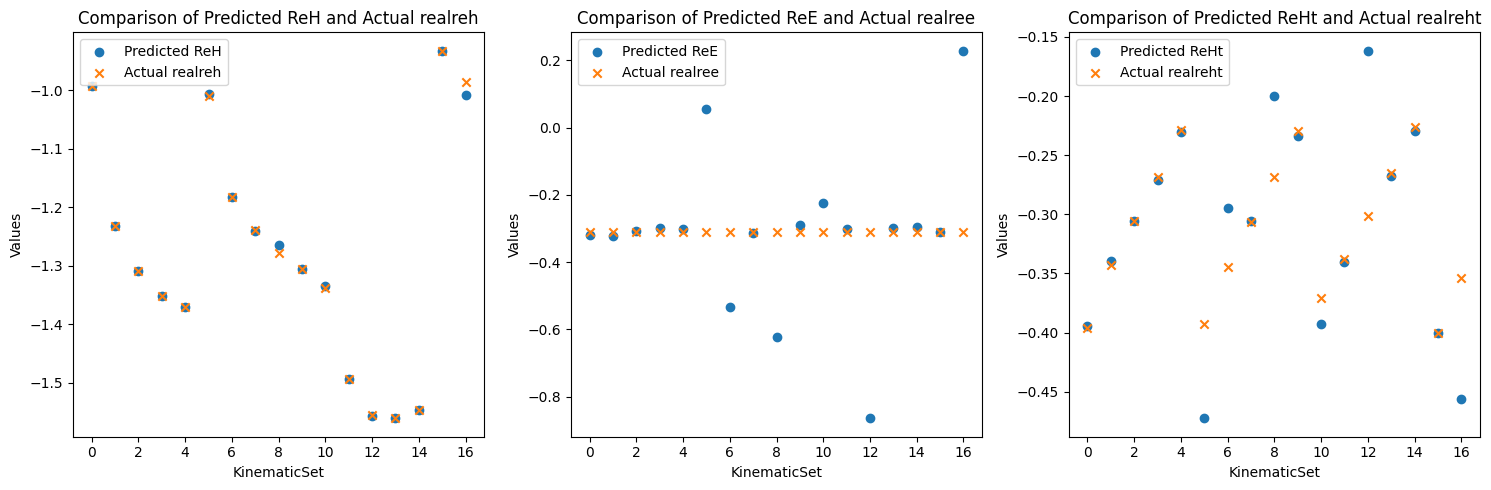

In [16]:
def plot(df):
    # Assuming df is your DataFrame
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Plot for ReH
    axes[0].scatter(df['KinematicSet'], df['ReH'], label='Predicted ReH')
    axes[0].scatter(df['KinematicSet'], df['realreh'], label='Actual realreh', marker='x')
    axes[0].set_title('Comparison of Predicted ReH and Actual realreh')
    axes[0].set_xlabel('KinematicSet')
    axes[0].set_ylabel('Values')
    axes[0].legend()

    # Plot for ReE
    axes[1].scatter(df['KinematicSet'], df['ReE'], label='Predicted ReE')
    axes[1].scatter(df['KinematicSet'], df['realree'], label='Actual realree', marker='x')
    axes[1].set_title('Comparison of Predicted ReE and Actual realree')
    axes[1].set_xlabel('KinematicSet')
    axes[1].set_ylabel('Values')
    axes[1].legend()

    # Plot for ReHt
    axes[2].scatter(df['KinematicSet'], df['ReHt'], label='Predicted ReHt')
    axes[2].scatter(df['KinematicSet'], df['realreht'], label='Actual realreht', marker='x')
    axes[2].set_title('Comparison of Predicted ReHt and Actual realreht')
    axes[2].set_xlabel('KinematicSet')
    axes[2].set_ylabel('Values')
    axes[2].legend()

    plt.tight_layout()
    plt.show()
